# 회귀 분석

#### 회귀 분석 : 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법

RSS : 오류 값의 제곱을 구해서 더하여, 최솟값이 되는 모델을 찾는 것 → 일차방정식
어떻게 오류 값이 최소가 되는 것을 찾을 수 있을까?
 - 경사 하강법 <br/>
 RSS식을 최솟값을 구하기 위해서는 내부 함수를 미분하여 극대 또는 극소점을 찾는 과정이 필요하다. <br/>
 도함수를 미분했을 때, 0이 되는 곳이 함수의 극대 또는 극소 값이기 때문에 결론적으로 최솟값을 가지는 것을 알 수 있다. <br/>
 도함수가 0이 되는 곳을 찾기 위해서 임의의 그래프 내의 값에 최초 w를 정해준 이후, 점차 기울기의 값이 작아지는 것을 찾는 방법이다. <br/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

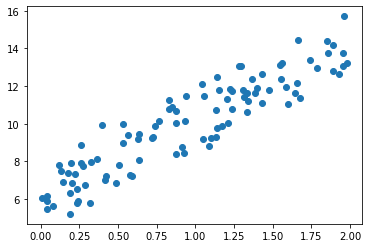

In [2]:
np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 6 + 4*X+np.random.randn(100,1)

plt.scatter(X,y)

# random.rand = 0부터 1까지 균일한 확률 분포로 실수 난수 생성
# random.randn = 평균이 0이고 표준편차가 1인 표준 정규 분포 생성

In [3]:
#전체 RSS의 값읠 계산해서 반환하는 함수이다.
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [4]:
# Numpy 행렬로 이루어진 w1과 w2를 지속적으로 갱신해주는 함수이다.
# 행렬값을 갱신하기 위해서 Transpose시켜준 이후에 dot product를 이용해서 계산한다.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
   
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    
    return w1_update, w0_update

# zeros_like(w1) → w1과 같은 크기와 사이즈를 가진 0으로 대체된 array를 생성한다.

In [5]:
# 갱신해준 w0와 w1을 적용하는 함수이다.
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for i in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [6]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X +w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


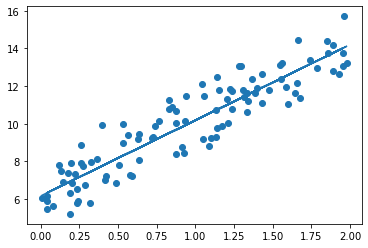

In [7]:
plt.scatter(X,y)
plt.plot(X, y_pred)

경사 하강법은 시간이 많이 걸리기 때문에, 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 사용한다.

In [8]:
#다음은 (미니 배치)확률적 경사하강법이다
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for i in range(iters):
        np.random.seed(i)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1 : ", round(w1[0,0], 3), "w0 : ", round(w0[0,0], 3))
y_pred = w1[0,0] * X +w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1 :  4.028 w0 :  6.156
Stochastic Gradient Descent Total Cost:0.9937


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### LinearRegression은 RSS를 최소화 OLS(Ordinary Least Squares - 최소자승법) 추정 방식으로 구현한 클래스이다.

class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1) <br/>
 - fit_intercept : Boolean 값으로, default 값은 True이다. False값으로 지정했을 때 항상 절편이 0이다.
 - normalize : Boolean 값으로, default 값은 False이다. True값으로 지정했을 때, 입력 데이터 세트를 정규화한다.

In [10]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [12]:
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


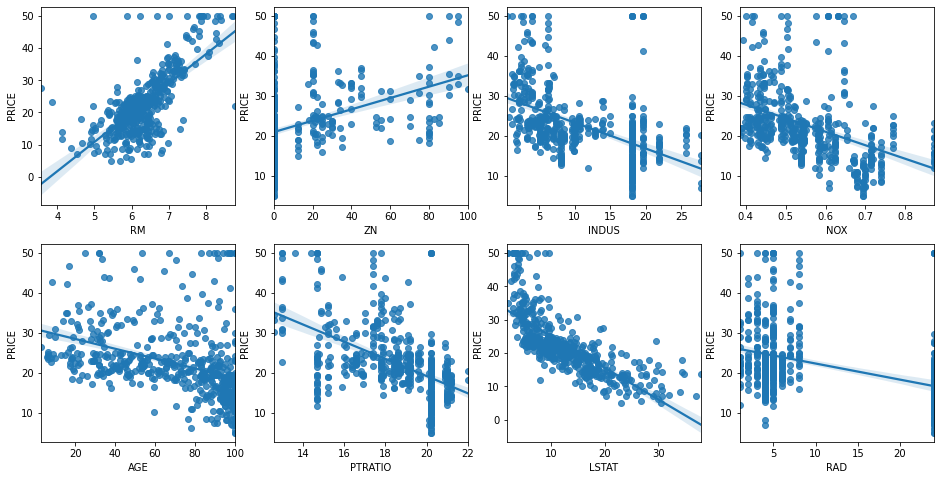

In [13]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
# coef_!!!

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [15]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_,1))

절편 값 :  40.995595172164315
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)
#sort_values 값을 기준으로 정렬하는 함수

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


## 다항 회귀

 - 다항식으로 표현된 것
 - 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀도 선형회귀이다. <br/>
   → 선형 회귀와 비선형 회귀를 구분하는 것은 회귀의 계수가 선형인지 비선형인지에 따라 나누는 것이다. <br/>

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처:\n", poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


In [20]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature : \n',poly_ftr)

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

#pipeline을 이용해서 PolynomialFeatures와 LinearRegression을 연결시켜준다.

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X):
    return np.cos(1.5*np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.rand(n_samples) * 0.1

#def true_fun = X값에대한 Cos값으로 변환, 왜 Cos으로 변환시켜주는거지?
#np.random.seed() = 난수를 예측 가능하게 만들어준다.


Degree 1 회귀 계수는 [-1.52] 입니다.
Degree 1 MSE는 0.38559805246752143 입니다.

Degree 4 회귀 계수는 [  1.74 -22.98  31.58 -11.24] 입니다.
Degree 4 MSE는 0.005719308263122468 입니다.

Degree 15 회귀 계수는 [ 1.20140000e+02 -3.59878000e+03  5.21457700e+04 -4.14488920e+05
  1.80877547e+06 -3.38036181e+06 -6.02529057e+06  5.58400586e+07
 -1.69819814e+08  3.08619733e+08 -3.68956348e+08  2.93840390e+08
 -1.50693077e+08  4.51467344e+07 -6.01497879e+06] 입니다.
Degree 15 MSE는 42947883.76174808 입니다.


<function matplotlib.pyplot.show(close=None, block=None)>

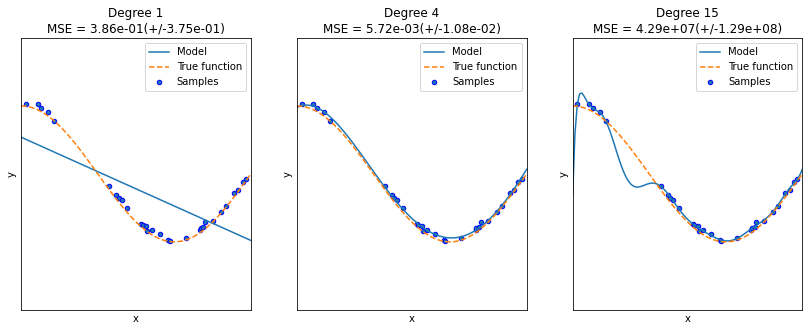

In [23]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False) #include_bias : True가 default값이며 상수항을 만든다.
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    X_test = np.linspace(0,1,100)
    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show

그림 1 - 과소적합(편향이 높지만 분산이 낮다) <br/>
그림 2 - 과적합(편향이 낮지만 분산이 높다) <br/>

## Ridge 회귀

Ridge회귀(L2 규제) - W^2에 대해 페널티를 부과한다

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 10)
neg_mse_score = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_score = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [25]:
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46  -26.049 -33.074 -80.762 -33.314]
5 folds의 개별 RMSE scores: [3.53  5.104 5.751 8.987 5.772]
5 folds의 평균 RMSE : 5.829


In [26]:
alphas = [0, 0.1, 1, 10, 100, 1000]
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330
alpha 1000 일 때 5 folds의 평균 RMSE : 5.598


IndexError: index 5 is out of bounds for axis 0 with size 5

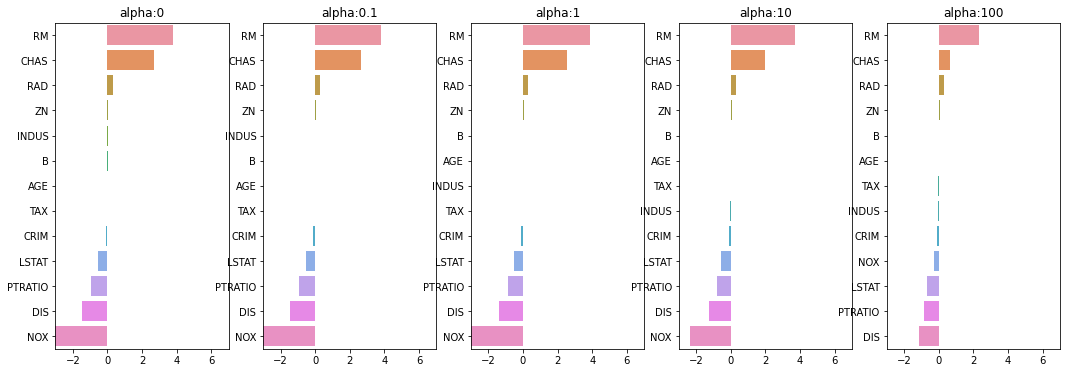

In [27]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,7)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [28]:
ridge_alphas = [0,0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100,alpha:1000
RM,3.809865,3.818233,3.854000,3.702272,2.334536,0.568555
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335,0.101449
RAD,0.306049,0.303515,0.290142,0.279596,0.315358,0.310743
ZN,0.046420,0.046572,0.047443,0.049579,0.054496,0.054378
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826,-0.036336
B,0.009312,0.009368,0.009673,0.010037,0.009393,0.007990
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212,0.030573
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856,-0.016602
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202,-0.090768
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764,-0.763721


## Lasso 회귀

|W|를 최소화 시키는 것 → 불필요한 회귀 계수를 감소시키기 위해서 사용한다.

In [37]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, '#######')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print('alpha {0} 일 때 5 폴드의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
            
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index = X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [38]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07 일 때 5 폴드의 평균 RMSE : 5.612
alpha 0.1 일 때 5 폴드의 평균 RMSE : 5.615
alpha 0.5 일 때 5 폴드의 평균 RMSE : 5.669
alpha 1 일 때 5 폴드의 평균 RMSE : 5.776
alpha 3 일 때 5 폴드의 평균 RMSE : 6.189


In [31]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [32]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07 일 때 5 폴드의 평균 RMSE : 5.542
alpha 0.1 일 때 5 폴드의 평균 RMSE : 5.526
alpha 0.5 일 때 5 폴드의 평균 RMSE : 5.467
alpha 1 일 때 5 폴드의 평균 RMSE : 5.597
alpha 3 일 때 5 폴드의 평균 RMSE : 6.068


In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method='None',p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [40]:
alphas = [0.1,1,10,100]
scale_methods = [(None, None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)

    print("\n변환 유형: {0}, Polynomial Degree: {1}".format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


변환 유형: None, Polynomial Degree: None
alpha 0.1 일 때 5 폴드의 평균 RMSE : 5.788
alpha 1 일 때 5 폴드의 평균 RMSE : 5.653
alpha 10 일 때 5 폴드의 평균 RMSE : 5.518
alpha 100 일 때 5 폴드의 평균 RMSE : 5.330

변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1 일 때 5 폴드의 평균 RMSE : 5.298
alpha 1 일 때 5 폴드의 평균 RMSE : 4.323
alpha 10 일 때 5 폴드의 평균 RMSE : 5.185
alpha 100 일 때 5 폴드의 평균 RMSE : 6.538

변환 유형: Log, Polynomial Degree: None
alpha 0.1 일 때 5 폴드의 평균 RMSE : 4.770
alpha 1 일 때 5 폴드의 평균 RMSE : 4.676
alpha 10 일 때 5 폴드의 평균 RMSE : 4.836
alpha 100 일 때 5 폴드의 평균 RMSE : 6.241


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

cancer = load_breast_cancer()

In [45]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [48]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print('accurac\n', accuracy_score(y_test, lr_pred))
print('roc_auc\n', roc_auc_score(y_test, lr_pred))

accurac
 0.9766081871345029
roc_auc
 0.9715608465608465


In [49]:
params={'penalty':['12','l1'], 'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.